#  A Novel Classification Algorithm for IDS

importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import sys
import sklearn
import io
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)        # to display all the attribute in screen(Jupyter)
pd.set_option('display.max_rows', 100)

<br/>

### Reading the Dataset 
*CIC_IDS_2018.csv* file contains the all the attacks(Anomaly)  
*benign.csv* file contains only benign(Normal)

In [3]:
df_anomaly_master = pd.read_csv("CIC_IDS_2018.csv", low_memory=False)
df_benign_master = pd.read_csv("benign.csv", low_memory=False)

In [4]:
df_master =  pd.concat([df_anomaly_master, df_benign_master])

<br/>

### Data Exploration

In [5]:
n_arow, n_acol = df_anomaly_master.shape
n_nrow, n_ncol = df_benign_master.shape
print("Number of rows(Anamoly)  :", n_arow)
print("Number of rows(Normal)   :", n_nrow)
print("Number of columns        :", n_ncol)

Number of rows(Anamoly)  : 1048573
Number of rows(Normal)   : 699988
Number of columns        : 80


In [6]:
n_row, n_col = df_master.shape
print("**************Records in Dataset************")
print("Number of rows     :", n_row)
print("Number of columns  :", n_col)

**************Records in Dataset************
Number of rows     : 1748561
Number of columns  : 80


<br/>

In [7]:
df_master.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,6,22-02-2018 10:13,6499677,13,10,2333,4425,431,0,179.4615385,177.7332343,1048,0,442.5,350.7307451,1039.743975,3.538637382,295439.8636,1070418.437,4950591,19,1549086,129090.5,340448.2048,1207835,432,6499652,722183.5556,1657146.09,5000999,560,0,0,0,0,272,212,2.00009939,1.538537992,0,1048,281.5833333,291.9189758,85216.68841,0,0,1,1,0,0,0,1,0,293.826087,179.4615385,442.5,0,0,0,0,0,0,13,2333,10,4425,8192,269,7,20,0,0,0,0,0,0,0,0,Brute Force -Web
1,80,6,22-02-2018 10:13,46,2,0,0,0,0,0,0,0,0,0,0,0,0,43478.26087,46,0,46,46,46,46,0,46,46,0,0,0,0,0,0,0,0,0,40,0,43478.26087,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2050,-1,0,20,0,0,0,0,0,0,0,0,Brute Force -Web
2,80,6,22-02-2018 10:13,6397036,4,7,372,9375,372,0,93,186,2920,0,1339.285714,1494.52453,1523.674402,1.719546365,639703.6,1594659.083,5004563,2,1392473,464157.6667,802081.3405,1390321,310,6397022,1066170.333,2008158.805,5004994,2,0,0,0,0,92,152,0.625289587,1.094256778,0,2920,812.25,1285.542272,1652618.932,0,0,1,1,0,0,0,1,1,886.0909091,93,1339.285714,0,0,0,0,0,0,4,372,7,9375,8192,219,1,20,0,0,0,0,0,0,0,0,Brute Force -Web
3,80,6,22-02-2018 10:13,6,2,0,0,0,0,0,0,0,0,0,0,0,0,333333.3333,6,0,6,6,6,6,0,6,6,0,0,0,0,0,0,0,0,0,40,0,333333.3333,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2053,-1,0,20,0,0,0,0,0,0,0,0,Brute Force -Web
4,80,6,22-02-2018 10:13,5022507,4,4,599,364,599,0,149.75,299.5,364,0,91,182,191.7369154,1.592830035,717501,1867356.779,4952048,19,70459,23486.33333,36859.16741,65993,366,5022484,1674161.333,2884723.87,5005150,4462,0,0,0,0,92,92,0.796415017,0.796415017,0,599,107,220.2997957,48532,0,0,1,1,0,0,0,1,1,120.375,149.75,91,0,0,0,0,0,0,4,599,4,364,8192,220,1,20,0,0,0,0,0,0,0,0,Brute Force -Web


In [8]:
df_master.tail()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
699983,443,6,02/03/2018 09:12:49,100012487,7,10,397,124.0,191,31,56.714286,59.233195,31,0,12.4,16.008331,5.20935,0.169979,6250780.437,9505235.061,20000000.0,168.0,99900000.0,16700000.0,8161870.312,20100000.0,179.0,99900000.0,11100000.0,10500000.0,20000000.0,85093.0,1,0,0,0,140,200,0.069991,0.099988,0,191,30.666667,43.007523,1849.647059,0,1,0,0,1,0,0,0,1,32.470588,56.714286,12.4,0,0,0,0,0,0,7,397,10,124,144,149,6,20,85158.0,37.702785,85184.0,85093.0,19900000.0,243693.3508,20000000.0,19500000.0,Benign
699984,80,6,02/03/2018 09:13:56,54169632,2,0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.036921,54200000.0,0.0,54200000.0,54200000.0,54200000.0,54200000.0,0.0,54200000.0,54200000.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,0.036921,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,279,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
699985,80,6,02/03/2018 09:14:50,5413063,4,4,97,231.0,97,0,24.25,48.5,231,0,57.75,115.5,60.594159,1.477906,773294.7143,2019405.937,5352600.0,40.0,60463.0,20154.33333,34575.81619,60079.0,139.0,5412858.0,1804286.0,3124661.227,5412334.0,202.0,0,0,0,0,92,92,0.738953,0.738953,0,231,36.444444,79.69961,6352.027778,0,0,0,1,0,0,0,0,1,41.0,24.25,57.75,0,0,0,0,0,0,4,97,4,231,8192,141,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
699986,443,6,02/03/2018 09:13:56,60228761,12,14,370,3264.0,239,0,30.833333,74.829301,1460,0,233.142857,522.560686,60.336622,0.431687,2409150.44,4322180.666,10000000.0,1.0,60200000.0,5475341.909,5201796.271,10100000.0,344.0,60200000.0,4627637.923,5180172.949,10100000.0,1.0,0,0,0,0,252,284,0.19924,0.232447,0,1460,134.592593,387.038883,149799.0969,0,0,0,1,0,0,0,0,1,139.769231,30.833333,233.142857,0,0,0,0,0,0,12,370,14,3264,8192,48180,7,20,94190.5,60395.24267,217467.0,69235.0,9943907.333,157243.1205,10000000.0,9622938.0,Benign
699987,445,6,02/03/2018 09:13:16,212988,2,0,1,0.0,1,0,0.5,0.707107,0,0,0.0,0.0,4.6951,9.3902,212988.0,0.0,212988.0,212988.0,212988.0,212988.0,0.0,212988.0,212988.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,52,0,9.3902,0.0,0,1,0.666667,0.57735,0.333333,0,0,0,0,1,0,0,0,0,1.0,0.5,0.0,0,0,0,0,0,0,2,1,0,0,253,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


<br/>

## Data Preprocessing
Removing/droping the timestamp column

In [9]:
df_master = df_master.drop(["Timestamp"], axis="columns")

Datatype casting

In [11]:
for col_name in df_master.columns:
    if col_name != "Label":
        df_master[col_name] = pd.to_numeric(df_master[col_name],errors = 'coerce')  
df_master = df_master.convert_dtypes()

In [12]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748561 entries, 0 to 699987
Data columns (total 79 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           Int64  
 1   Protocol           Int64  
 2   Flow Duration      Float64
 3   Tot Fwd Pkts       Int64  
 4   Tot Bwd Pkts       Int64  
 5   TotLen Fwd Pkts    Int64  
 6   TotLen Bwd Pkts    Int64  
 7   Fwd Pkt Len Max    Int64  
 8   Fwd Pkt Len Min    Int64  
 9   Fwd Pkt Len Mean   Float64
 10  Fwd Pkt Len Std    Float64
 11  Bwd Pkt Len Max    Int64  
 12  Bwd Pkt Len Min    Int64  
 13  Bwd Pkt Len Mean   Float64
 14  Bwd Pkt Len Std    Float64
 15  Flow Byts/s        Float64
 16  Flow Pkts/s        Float64
 17  Flow IAT Mean      Float64
 18  Flow IAT Std       Float64
 19  Flow IAT Max       Float64
 20  Flow IAT Min       Float64
 21  Fwd IAT Tot        Float64
 22  Fwd IAT Mean       Float64
 23  Fwd IAT Std        Float64
 24  Fwd IAT Max        Float64
 25  Fwd IAT Min        

<br/> 

 
#### Data cleaning
Removing the null values

In [14]:
df_master.replace([np.inf, -np.inf], np.nan, inplace=True)
df_master = df_master.dropna()
df_master.isnull().any()

Dst Port             False
Protocol             False
Flow Duration        False
Tot Fwd Pkts         False
Tot Bwd Pkts         False
TotLen Fwd Pkts      False
TotLen Bwd Pkts      False
Fwd Pkt Len Max      False
Fwd Pkt Len Min      False
Fwd Pkt Len Mean     False
Fwd Pkt Len Std      False
Bwd Pkt Len Max      False
Bwd Pkt Len Min      False
Bwd Pkt Len Mean     False
Bwd Pkt Len Std      False
Flow Byts/s          False
Flow Pkts/s          False
Flow IAT Mean        False
Flow IAT Std         False
Flow IAT Max         False
Flow IAT Min         False
Fwd IAT Tot          False
Fwd IAT Mean         False
Fwd IAT Std          False
Fwd IAT Max          False
Fwd IAT Min          False
Bwd IAT Tot          False
Bwd IAT Mean         False
Bwd IAT Std          False
Bwd IAT Max          False
Bwd IAT Min          False
Fwd PSH Flags        False
Bwd PSH Flags        False
Fwd URG Flags        False
Bwd URG Flags        False
Fwd Header Len       False
Bwd Header Len       False
F

In [15]:
df_master.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1742617.0,1.742617e+06,1742617.0,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1742617.0,1742617.0,1742617.0,1742617.0,1742617.0,1742617.0,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06,1.742617e+06
mean,7.413419e+03,7.565657e+00,6.440088e+06,1.216365e+02,5.149467e+00,4.229965e+03,2.549387e+03,1.934994e+02,7.103408e+00,4.430022e+01,6.803163e+01,3.007586e+02,1.462704e+01,8.709428e+01,1.166756e+02,1.551049e+06,1.598784e+06,5.062609e+06,-5.091433e+05,6.166842e+06,1.842144e+06,1.512771e+06,4.886940e+06,-2.561860e+05,5.098413e+06,7.441980e+05,6.244849e+05,1.877929e+06,3.313734e+05,2.624444e-02,0.0,1.218856e-03,0.0,1.058537e+03,1.216050e+02,1.359456e+05,1.238936e+05,6.996771e+00,3.465863e+02,6.278341e+01,1.060775e+02,3.542269e+04,2.413611e-03,2.624444e-02,1.652056e-01,6.087505e-01,2.314972e-01,7.685911e-02,1.218856e-03,1.652050e-01,6.355631e-01,7.143410e+01,4.430022e+01,8.709428e+01,0.0,0.0,0.0,0.0,0.0,0.0,1.216365e+02,4.229965e+03,5.149467e+00,2.549342e+03,1.536309e+04,6.921130e+03,1.186655e+02,2.515725e+01,1.477068e+05,6.417071e+04,2.114425e+05,1.044761e+05,3.218706e+06,5.638637e+05,4.404178e+06,2.523822e+06
std,1.814337e+04,3.972566e+00,9.777448e+08,3.801640e+03,1.059241e+02,1.252164e+05,1.517153e+05,3.355571e+02,2.751097e+01,7.054172e+01,1.230409e+02,4.655799e+02,4.024938e+01,1.442023e+02,1.894498e+02,2.585757e+08,5.688311e+08,1.186964e+09,1.272801e+09,9.777423e+08,2.586140e+08,5.688265e+08,1.186963e+09,1.272810e+09,2.141215e+07,5.311318e+06,3.014457e+06,9.205390e+06,4.582903e+06,1.598614e-01,0.0,3.489085e-02,0.0,3.045257e+04,2.097652e+03,2.782074e+05,2.429458e+05,2.660622e+01,5.068776e+02,9.514307e+01,1.554684e+02,4.215626e+05,4.906921e-02,1.598614e-01,3.713661e-01,4.880302e-01,4.217895e-01,2.663679e-01,3.489085e-02,3.713655e-01,6.201407e-01,1.018071e+02,7.054172e+01,1.442023e+02,0.0,0.0,0.0,0.0,0.0,0.0,3.801640e+03,1.252164e+05,1.059241e+02,1.517218e+05,1.856536e+04,1.764450e+04,3.801465e+03,1.088649e+01,2.111047e+06,1.258627e+06,2.791159e+06,1.783528e+06,4.201264e+08,2.963265e+08,1.180758e+09,1.667131e+07
min,0.000000e+00,0.000000e+00,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000

<br/>

In [16]:
print("*******Attack types and it counts in dataset***********")
c = df_master.Label.value_counts().to_frame()
c.rename(columns = { "Label" : "count"}, inplace = True)
c.index.names = ["Attacks"]
c.reset_index(level=0, inplace=True)
c

*******Attack types and it counts in dataset***********


,Attacks,count
0,Benign,696011
1,Infilteration,253038
2,FTP-BruteForce,193354
3,SSH-Bruteforce,187589
4,DoS attacks-SlowHTTPTest,186123
5,DoS attacks-Hulk,120514
6,DDoS attacks-LOIC-HTTP,42930
7,DoS attacks-GoldenEye,41508
8,DoS attacks-Slowloris,10990
9,DDOS attack-HOIC,8091


<br/>

In [21]:
dfn = df_master.copy()

Encoding Label *Anamoly* as 1 and the *Benign* as 0

In [22]:
y_multi = dfn.iloc[:, -1]

In [23]:
dfn["Label"] = np.where(dfn["Label"] == "Benign", 0, 1)

<br/>

In [24]:
X = dfn.iloc[:, :-1]
y = dfn.iloc[:, -1]

## Feature Selection

## A. Filter methods
Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

### A.1 Chi Square
A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

### Feature Scaling
MinMaxScaler

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

#### train_test_split
train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. 

In [33]:
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures = SelectKBest(score_func=chi2, k = 78)
fit = bestfeatures.fit(X_scaled, y)

In [34]:
dfscores = pd.DataFrame(fit.scores_).convert_dtypes()
dfcolumns = pd.DataFrame(X.columns)

In [35]:
featuresScores = pd.concat([dfcolumns, dfscores], axis = 1)
featuresScores.columns = ["attributes", "score"]

In [37]:
featuresScores.nlargest(78, "score")

,attributes,score
67,Init Bwd Win Byts,162687.601187
0,Dst Port,153895.438536
46,RST Flag Cnt,84488.095222
51,ECE Flag Cnt,84484.847948
38,Bwd Pkts/s,60731.464324
69,Fwd Seg Size Min,58339.576534
16,Flow Pkts/s,53257.867534
37,Fwd Pkts/s,23316.660616
49,URG Flag Cnt,20889.807201
47,PSH Flag Cnt,18266.916767


In [39]:
attr = featuresScores.nlargest(78, "score")
cols = attr.iloc[:21, 0].values                 # getting the top 21 columns
df_chi = dfn[cols]                              # creating dataframe

In [43]:
df_chi.shape

(1742617, 21)

In [44]:
df_chi.head()

,Init Bwd Win Byts,Dst Port,RST Flag Cnt,ECE Flag Cnt,Bwd Pkts/s,Fwd Seg Size Min,Flow Pkts/s,Fwd Pkts/s,URG Flag Cnt,PSH Flag Cnt,Bwd IAT Tot,Protocol,Bwd Pkt Len Min,SYN Flag Cnt,Fwd PSH Flags,Pkt Len Min,Fwd Pkt Len Min,Fwd Pkt Len Std,ACK Flag Cnt,Pkt Size Avg,Fwd Seg Size Avg
0,269,80,1,1,1.538538,20,3.538637,2.000099,0,1,6499652,6,0,0,0,0,0,177.733234,0,293.826087,179.461538
1,-1,80,0,0,0.0,20,43478.26087,43478.26087,0,0,0,6,0,0,0,0,0,0.0,1,0.0,0.0
2,219,80,1,1,1.094257,20,1.719546,0.62529,0,1,6397022,6,0,0,0,0,0,186.0,0,886.090909,93.0
3,-1,80,0,0,0.0,20,333333.3333,333333.3333,0,0,0,6,0,0,0,0,0,0.0,1,0.0,0.0
4,220,80,1,1,0.796415,20,1.59283,0.796415,0,1,5022484,6,0,0,0,0,0,299.5,0,120.375,149.75


## Decision Tree For Chi-Squared


#### Gini Criterion classification

In [51]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scalar.fit(df_chi)
X_scaled_chi = scalar.transform(df_chi)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_chi, y, test_size=0.3, random_state=None)

from sklearn.tree import DecisionTreeClassifier
clf_gini_chi = DecisionTreeClassifier(criterion='gini')

clf_gini_chi.fit(X_train, y_train)
y_pred_gini_chi = clf_gini_chi.predict(X_test)
print("******Criterion: GINI**********")
print('(Model)Training set score: {:.4f}'.format(clf_gini_chi.score(X_train, y_train)))
print('(Model)Test set score: {:.4f}'.format(clf_gini_chi.score(X_test, y_test)))


******Criterion: GINI**********
(Model)Training set score: 0.9686
(Model)Test set score: 0.9062


#### Entropy Criterion Classification

In [52]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scalar.fit(df_chi)
X_scaled_chi = scalar.transform(df_chi)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_chi, y, test_size=0.3, random_state=None)

from sklearn.tree import DecisionTreeClassifier
clf_en_chi = DecisionTreeClassifier(criterion='entropy')

clf_en_chi.fit(X_train, y_train)
y_pred_en_chi = clf_en_chi.predict(X_test)
print("******Criterion: Entropy**********")
print('(Model)Training set score: {:.4f}'.format(clf_en_chi.score(X_train, y_train)))
print('(Model)Test set score: {:.4f}'.format(clf_en_chi.score(X_test, y_test)))


******Criterion: Entropy**********
(Model)Training set score: 0.9684
(Model)Test set score: 0.9070


#### Classification Report for CHI

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en_chi)

print('Confusion matrix\n', cm)
print("\n")
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:\n",classification_report(y_test, y_pred_en_chi))

Confusion matrix
 [[184307  24385]
 [ 24256 289838]]


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88    208692
           1       0.92      0.92      0.92    314094

    accuracy                           0.91    522786
   macro avg       0.90      0.90      0.90    522786
weighted avg       0.91      0.91      0.91    522786



[Text(0.521875, 0.9285714285714286, 'X[5] <= -0.29\ngini = 0.48\nsamples = 1219831\nvalue = [486871, 732960]'),
 Text(0.26666666666666666, 0.7857142857142857, 'X[0] <= 1.458\ngini = 0.39\nsamples = 645487\nvalue = [474276, 171211]'),
 Text(0.13333333333333333, 0.6428571428571429, 'X[2] <= 0.902\ngini = 0.437\nsamples = 480035\nvalue = [325432, 154603]'),
 Text(0.06666666666666667, 0.5, 'X[9] <= -0.223\ngini = 0.364\nsamples = 410858\nvalue = [312410, 98448]'),
 Text(0.03333333333333333, 0.35714285714285715, 'X[1] <= 2.437\ngini = 0.409\nsamples = 327425\nvalue = [233737, 93688]'),
 Text(0.016666666666666666, 0.21428571428571427, 'X[20] <= -0.312\ngini = 0.396\nsamples = 294343\nvalue = [214422, 79921]'),
 Text(0.008333333333333333, 0.07142857142857142, 'gini = 0.298\nsamples = 96233\nvalue = [78724, 17509]'),
 Text(0.025, 0.07142857142857142, 'gini = 0.432\nsamples = 198110\nvalue = [135698, 62412]'),
 Text(0.05, 0.21428571428571427, 'X[1] <= 2.7\ngini = 0.486\nsamples = 33082\nvalue =

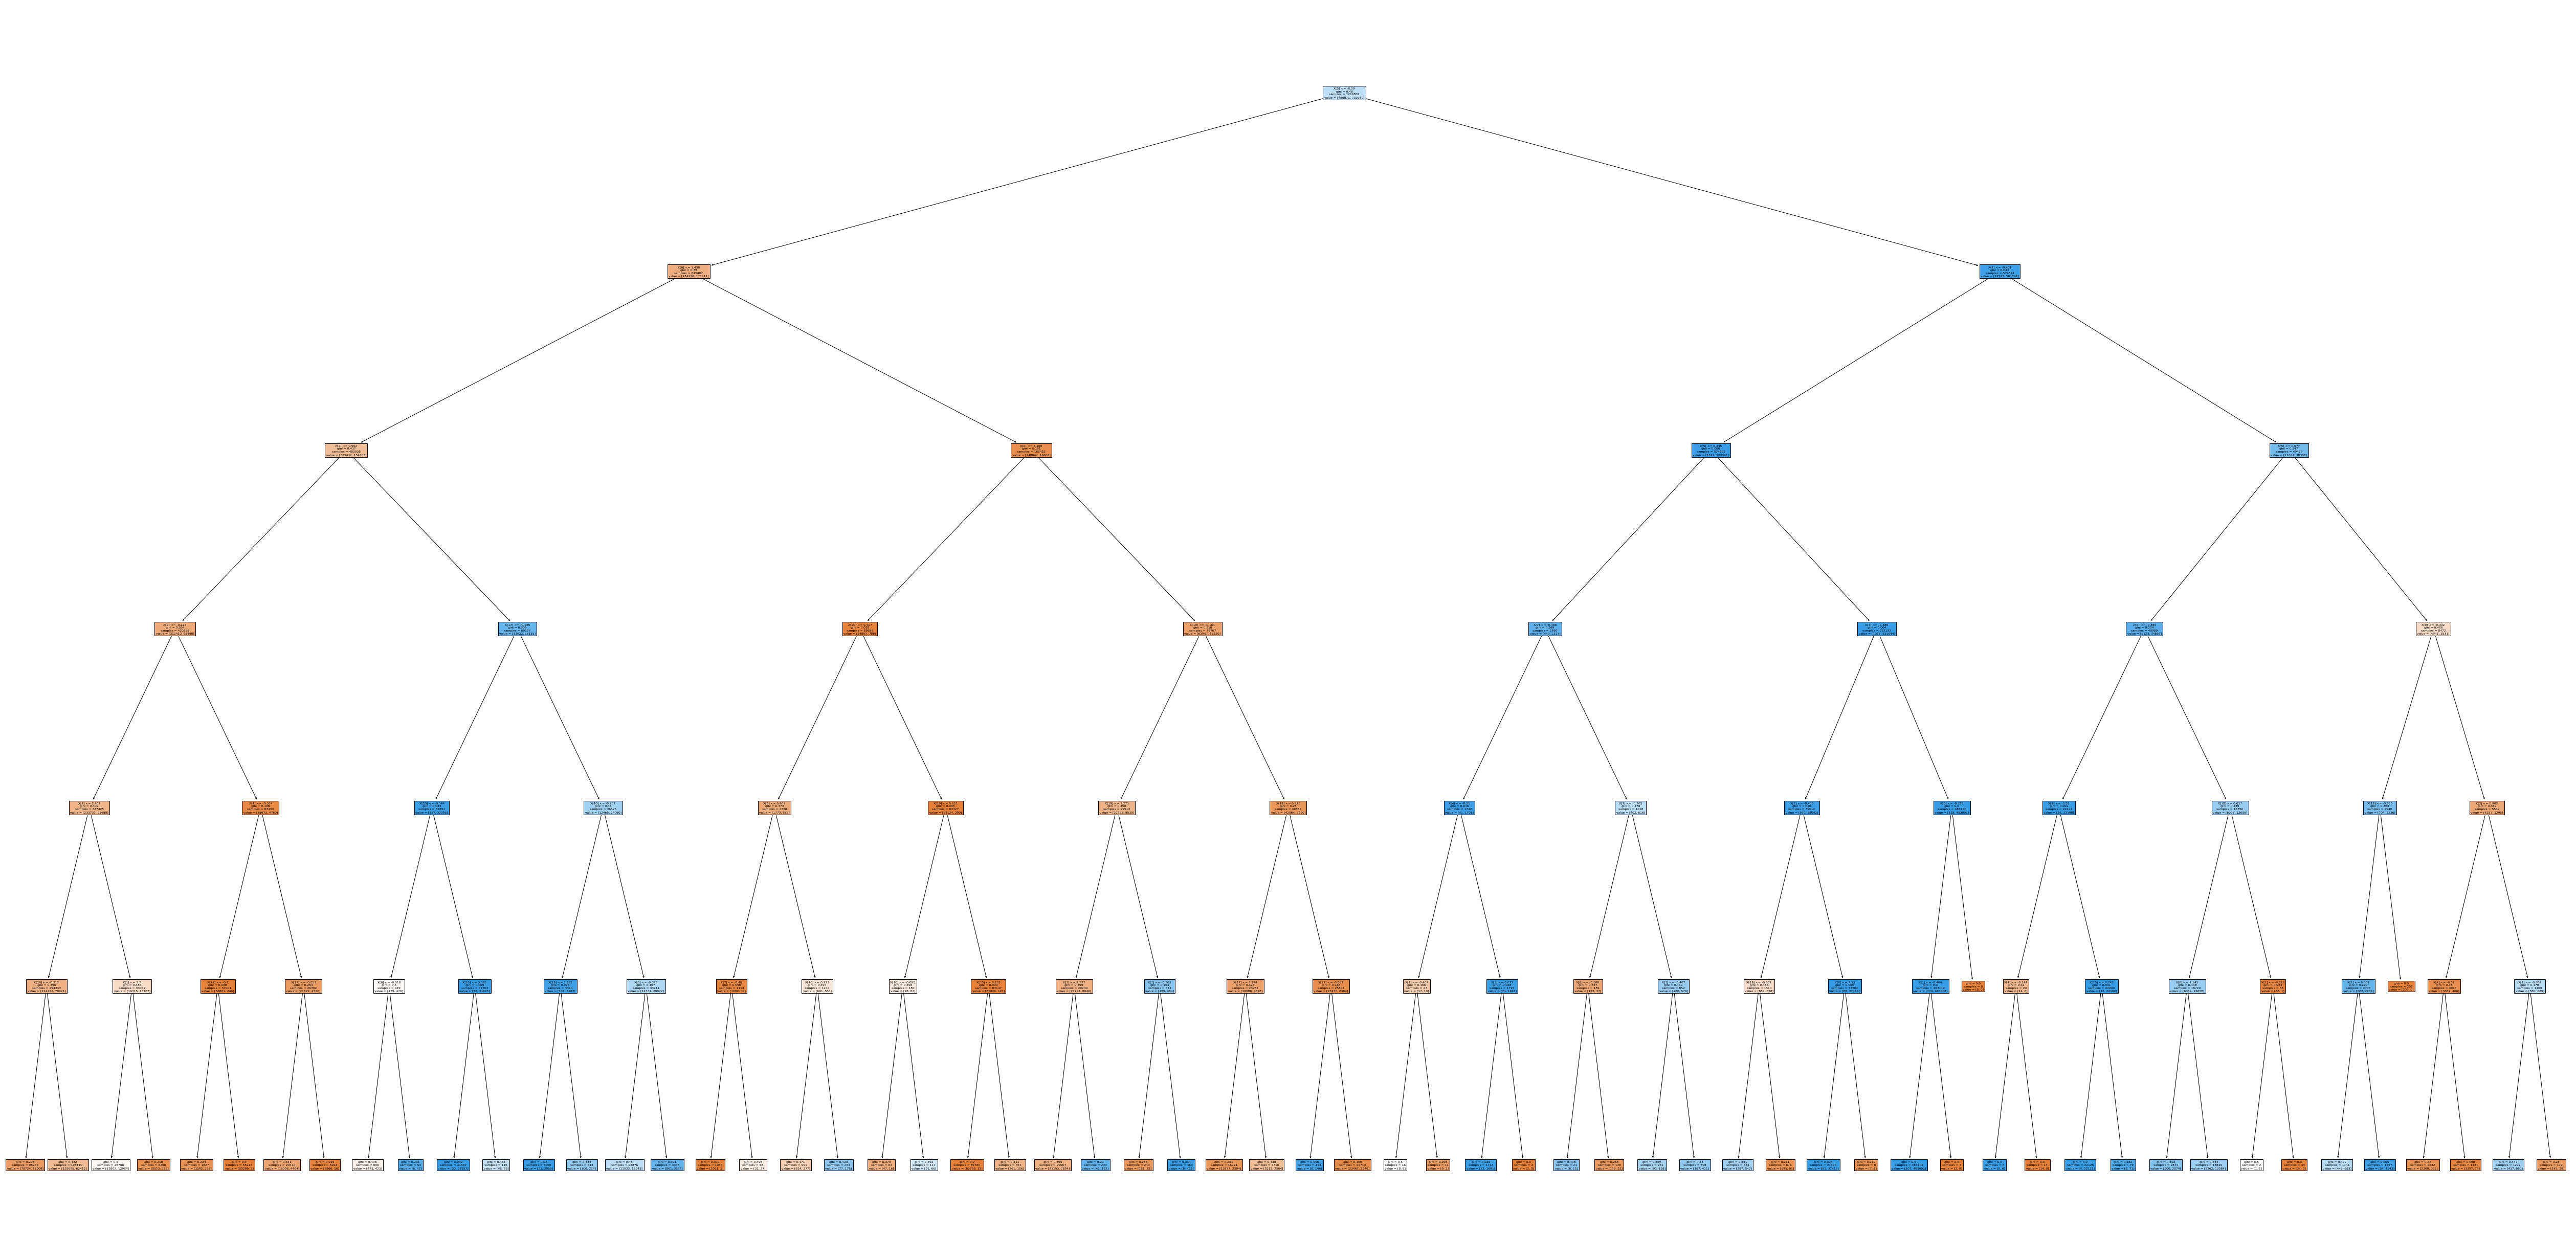

In [78]:
from sklearn import tree
plt.figure(figsize=(90, 45))
tree.plot_tree(clf_gini_chi, filled=True)

<br/>

### Principal Component Analysis

Standard Scaler

In [79]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scalar.fit(X)
X_scaled_pca = scalar.transform(X)

<br/>

In [80]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

pca.fit(X_scaled_pca)
X_pca = pca.transform(X_scaled_pca)

In [81]:
att_cnt = X_pca.shape[1]
print("Reduced to", att_cnt, "attributes")

Reduced to 22 attributes


#### Plotting the explained variance ratio

In [82]:
pca.explained_variance_ratio_

array([0.16674524, 0.15166077, 0.08545642, 0.07230583, 0.06897603,
       0.05616307, 0.04580903, 0.0432572 , 0.03711388, 0.03492847,
       0.03137168, 0.02431838, 0.01948137, 0.0180409 , 0.01520269,
       0.01457592, 0.01357792, 0.012694  , 0.01255227, 0.01215649,
       0.01102533, 0.00982769])

<br/>

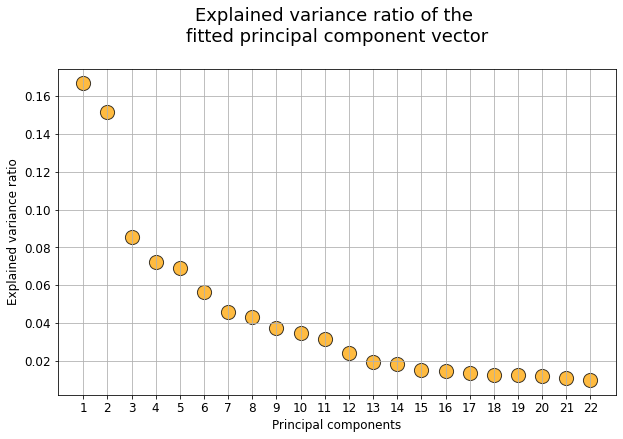

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=18)
plt.xlabel("Principal components",fontsize=12)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Explained variance ratio",fontsize=12)
plt.show()

## Decision Tree for PCA

#### Gini Criterion Classification

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=None)

from sklearn.tree import DecisionTreeClassifier
clf_gini_pca= DecisionTreeClassifier(criterion='gini')
# fit the model
clf_gini_pca.fit(X_train, y_train)
y_pred_gini_pca = clf_gini_pca.predict(X_test)
y_pred_train_gini_pca = clf_gini_pca.predict(X_train)
# print the scores on training and test set
print('(Model)Training set score: {:.4f}'.format(clf_gini_pca.score(X_train, y_train)))
print('(Model)Test set score: {:.4f}'.format(clf_gini_pca.score(X_test, y_test)))

(Model)Training set score: 0.9794
(Model)Test set score: 0.9101


<br/>


#### Entropy Criterion Classification

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=None)

from sklearn.tree import DecisionTreeClassifier
clf_en_pca= DecisionTreeClassifier(criterion='entropy')
# fit the model
clf_en_pca.fit(X_train, y_train)
y_pred_en_pca = clf_en_pca.predict(X_test)
y_pred_train_en_pca = clf_en_pca.predict(X_train)
# print the scores on training and test set
print('(Model)Training set score: {:.4f}'.format(clf_en_pca.score(X_train, y_train)))
print('(Model)Test set score: {:.4f}'.format(clf_en_pca.score(X_test, y_test)))

(Model)Training set score: 0.9793
(Model)Test set score: 0.9109




<br/>

#### Classification Report

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en_pca)

print('Confusion matrix\n', cm)
print("\n")
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:\n",classification_report(y_test, y_pred_en_pca))

Confusion matrix
 [[183468  25222]
 [ 21364 292732]]


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89    208690
           1       0.92      0.93      0.93    314096

    accuracy                           0.91    522786
   macro avg       0.91      0.91      0.91    522786
weighted avg       0.91      0.91      0.91    522786



<br/>



### Random Forest Importance

Random Forests is a kind of a Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [91]:
X_train.shape

(1219831, 78)

In [92]:
sel = SelectFromModel(RandomForestClassifier())
sel.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier())

In [93]:
sel.get_support()

array([ True, False,  True, False, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False])

In [94]:
selected_feat= X.columns[(sel.get_support())]
len(selected_feat)

22

In [95]:
print(selected_feat)

Index(['Dst Port', 'Flow Duration', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Min', 'Fwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Fwd Seg Size Avg', 'Subflow Fwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min'],
      dtype='object')


In [96]:
df_rfi = dfn[selected_feat]   

In [98]:
df_rfi.head()

,Dst Port,Flow Duration,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Min,Fwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Fwd Seg Size Avg,Subflow Fwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min
0,80,6499677.0,2333,431,179.461538,350.730745,1039.743975,3.538637,295439.8636,4950591.0,19.0,1549086.0,129090.5,432.0,272,2.000099,1.538538,179.461538,2333,8192,269,20
1,80,46.0,0,0,0.0,0.0,0.0,43478.26087,46.0,46.0,46.0,46.0,46.0,46.0,40,43478.26087,0.0,0.0,0,2050,-1,20
2,80,6397036.0,372,372,93.0,1494.52453,1523.674402,1.719546,639703.6,5004563.0,2.0,1392473.0,464157.6667,310.0,92,0.62529,1.094257,93.0,372,8192,219,20
3,80,6.0,0,0,0.0,0.0,0.0,333333.3333,6.0,6.0,6.0,6.0,6.0,6.0,40,333333.3333,0.0,0.0,0,2053,-1,20
4,80,5022507.0,599,599,149.75,182.0,191.736915,1.59283,717501.0,4952048.0,19.0,70459.0,23486.33333,366.0,92,0.796415,0.796415,149.75,599,8192,220,20


<br/>

### Decision Tree For RFI

#### Gini Criterion Classification

In [101]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scalar.fit(df_rfi)
X_scaled_rfi = scalar.transform(df_rfi)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_rfi, y, test_size=0.3, random_state=None)

from sklearn.tree import DecisionTreeClassifier
clf_gini_rfi = DecisionTreeClassifier(criterion='gini')
# fit the model
clf_gini_rfi.fit(X_train, y_train)
y_pred_gini_rfi = clf_gini_rfi.predict(X_test)

y_pred_train_gini_rfi = clf_gini_rfi.predict(X_train)
# print the scores on training and test set
print('(Model)Training set score: {:.4f}'.format(clf_gini_rfi.score(X_train, y_train)))
print('(Model)Test set score: {:.4f}'.format(clf_gini_rfi.score(X_test, y_test)))

(Model)Training set score: 0.9747
(Model)Test set score: 0.9069


#### Entropy Criterion Classification

In [102]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

scalar.fit(df_rfi)
X_scaled_rfi = scalar.transform(df_rfi)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_rfi, y, test_size=0.3, random_state=None)

from sklearn.tree import DecisionTreeClassifier
clf_en_rfi = DecisionTreeClassifier(criterion='entropy')
# fit the model
clf_en_rfi.fit(X_train, y_train)
y_pred_en_rfi = clf_en_rfi.predict(X_test)

y_pred_train_en_rfi = clf_en_rfi.predict(X_train)
# print the scores on training and test set
print('(Model)Training set score: {:.4f}'.format(clf_en_rfi.score(X_train, y_train)))
print('(Model)Test set score: {:.4f}'.format(clf_en_rfi.score(X_test, y_test)))

(Model)Training set score: 0.9748
(Model)Test set score: 0.9068


In [104]:
print('accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en_rfi)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en_rfi)))

accuracy score: 0.9068
Training-set accuracy score: 0.9748


#### Classification Report

In [105]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en_rfi)

print('Confusion matrix\n', cm)
print("\n")
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:\n",classification_report(y_test, y_pred_en_rfi))

Confusion matrix
 [[183485  25294]
 [ 23416 290591]]


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88    208779
           1       0.92      0.93      0.92    314007

    accuracy                           0.91    522786
   macro avg       0.90      0.90      0.90    522786
weighted avg       0.91      0.91      0.91    522786



<br/>

<br/>

In [106]:
import pickle

In [112]:
with open("clf_en_rfi", "wb") as f:
    pickle.dump(clf_en_rfi, f)